# Common Setup

In [1]:
import numpy as np
import os

In [2]:
np.random.seed(42)

In [3]:
#Plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [4]:
# Save figures
PROJECT_ROOT_DIR="."
CHAPTER_ID="classification"

In [5]:
def save_fig(fig_id,tight_layout=True):
    path=os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving Figure", fig_id)
    if tight_layout:
        plt.tight_layout()
        plt.savefig(path,format='png',dpi=300)        

# MNIST

In [6]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target,i) for i, target in enumerate(mnist.target[:60000])]))[:,1]
    reorder_test = np.array(sorted([(target,i) for i, target in enumerate(mnist.target[60000:])]))[:,1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]    

In [7]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache = True)

In [8]:
mnist.target=mnist.target.astype(np.int8) #fetch openml() returns target as String
sort_by_target(mnist)
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [9]:
mnist.data.shape

(70000, 784)

In [10]:
X,y = mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

In [12]:
28*28

784

In [13]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

Saving Figure some_digit_plot


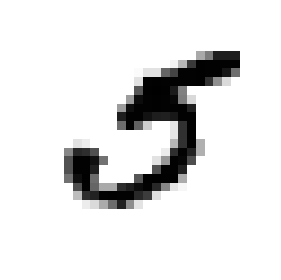

In [14]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary,
          interpolation="nearest")
plt.axis("off")
save_fig("some_digit_plot")
plt.show()

Let's define a method to do this

In [15]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=mpl.cm.binary,
              interpolation = "nearest")
    plt.axis("off")

In [19]:
def plot_digits(instances,images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances),images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances)-1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis = 1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
        

Saving Figure more_digits_plot


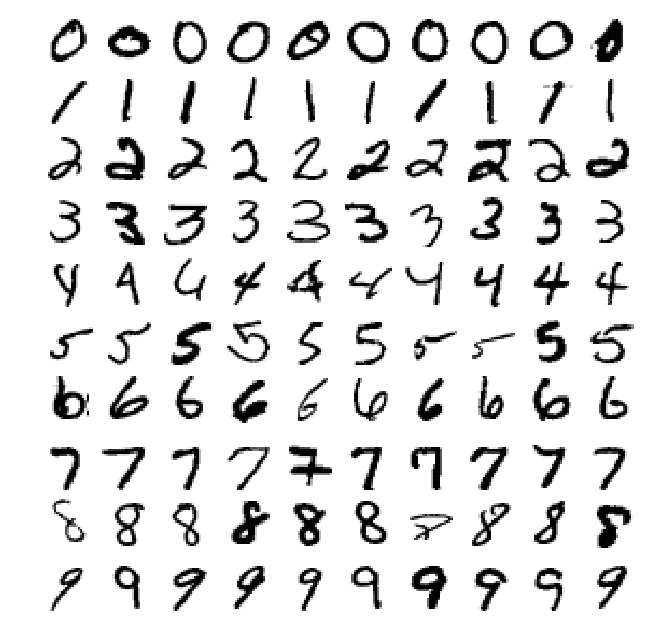

In [21]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600],X[13000:30600:600],X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

More details on understanding above code can be found here - https://github.com/ageron/handson-ml/issues/374

In [22]:
y[36000]

5

In this dataset, already the data is split into training set (first 60000 images) and testing set (the last 10000 images).

In [25]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

Let's shuffle the indices in the training set, to ensure there are no similar digits in a row.

In [26]:
import numpy as np
shuffle_index=np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier

In [27]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [28]:
from sklearn.linear_model import SGDClassifier

In [29]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

To remove the above warning, let's add the max_iter and tol parameters in the above code

In [30]:
sgd_clf=SGDClassifier(max_iter=5, tol = -np.infty, random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

### Measuring Accuracy Using Cross-Validation

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.9502 , 0.96565, 0.96495])

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [37]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [42]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_folds = X_train[test_index]
    y_test_folds = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

0.9502
0.96565
0.96495


This has above 95% accuracy, let's write a dumb classifier that just classifies every sigle digit as not-5.

In [45]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1),dtype=bool)

In [46]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring = "accuracy")

array([0.909  , 0.90715, 0.9128 ])

Even this has 90% accuracy. This shows why Accuracy is not a preferred performance measure in classifiers espeacially in skewed data sets.

### Confusion Matrix

To compute confusion matrix, we need a set of predictions, so they can be compared to a set of actual targets.

In [48]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5, cv=3)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]], dtype=int64)

A perfect classifier would be like this, it would have only trye positives and true negatives.

In [53]:
y_train_perfect_predictions = y_train_5

In [54]:
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Precision and Recall

precision = TP/TP+FP

In [55]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.7687135020350381

recall = TP/TP+FN

In [58]:
recall_score(y_train_5,y_train_pred)

0.801328168234643

Now, we can see it is correct only 77% of the time (not as good as when we checked accuracy). It only detects 80% of the 5s in this case.

We can combine precision and recall into a single metric called F1 score.

In [61]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7846820809248555

### Precision/Recall Tradeoff

SKLearn doesnot gives access to threshold, but we can access decision scores that it uses to make predictions.

In [62]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([161855.74572176])

In [63]:
threshold=0
y_some_digit_pred = (y_scores > threshold)

In [64]:
y_some_digit_pred

array([ True])

SGDClassifier uses a threshold = 0, so the above code returns the same result as the predict() method. Let's raise the threshold.

In [66]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [67]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                            method="decision_function")

In [69]:
y_scores.shape

(60000,)

In [70]:
y_scores.ndim

1

Now with these scores, you can compute precision and recall for all possible thresholds using the precision_recall_curve() method.

In [71]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving Figure precision_recall_vs_threshold_plot


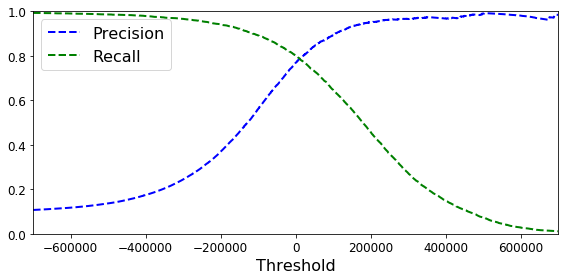

In [74]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1], "b--", label = "Precision", linewidth=2)
    plt.plot(thresholds,recalls[:-1], "g--", label = "Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [75]:
(y_train_pred == (y_scores > 0)).all()

True

If we aim 90% precision, we can see threshold hould be more than 70000 from above figure

In [79]:
y_train_pred_90 = (y_scores > 70000)

In [80]:
precision_score(y_train_5, y_train_pred_90)

0.8659205116491548

In [81]:
recall_score(y_train_5, y_train_pred_90)

0.6993174691016417

Saving Figure precision_vs_recall_plot


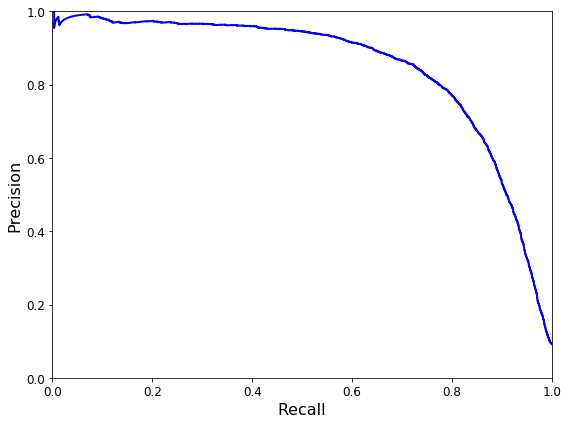

In [82]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()